# Multiple_Linear_Regression_Bike_Sharing_Assignment

## 1. Importing Necessary Libraries

In [97]:
# For analysis and Numerical Functions
import pandas as pd
import numpy as np

# For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action = 'ignore')

## 2. Dataset Loading and understanding Data

In [98]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
# to check the shape of dataset
df.shape

(730, 16)

### Missing Value Check

In [100]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [101]:
# to list the column names
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Data Dictionary

- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [102]:
# to check the data types of columns
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [103]:
# to check the number of unique values for each column
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Cleaning Data

### Drop columns that are not useful for analysis
- instant is just a row instance identifier which is not useful for analysis
- dteday consists of Date in dd-mm-yyyy format, and is recorded for every day from Jan 1st 2018., we also have year,month and weekday columns which we need for analysis. SO   we can drop dteday
- casual and registered columns will not be available at the time of prediction also, the sum of these columns exactly     equal to cnt, so we can drop these two columns.

In [104]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [105]:
# inspect data after dropping the unnecessary columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### convert season, mnth, weekday, weathersit to categorical types

In [106]:
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday =df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [107]:
# seggregating columns to cont_cols and cat_cols by observing data and dictionary
cont_cols = ['temp','atemp','hum','windspeed','cnt']
cat_cols = ['season', 'yr', 'mnth','holiday', 'weekday','workingday','weathersit']

### Univariate Analysis

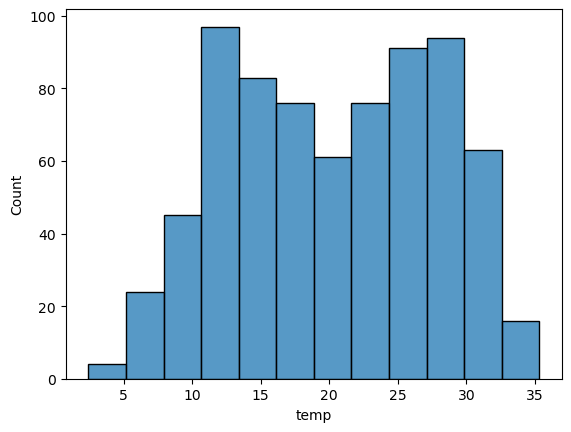

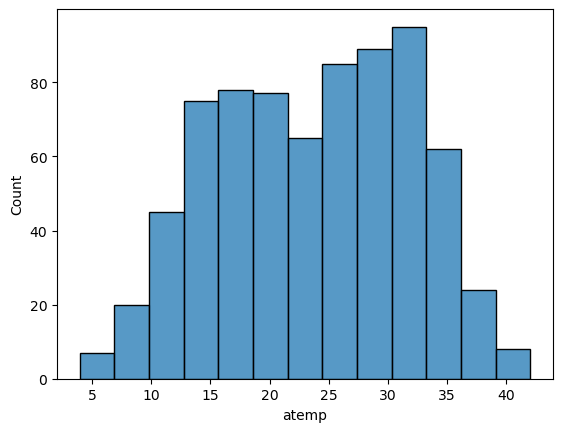

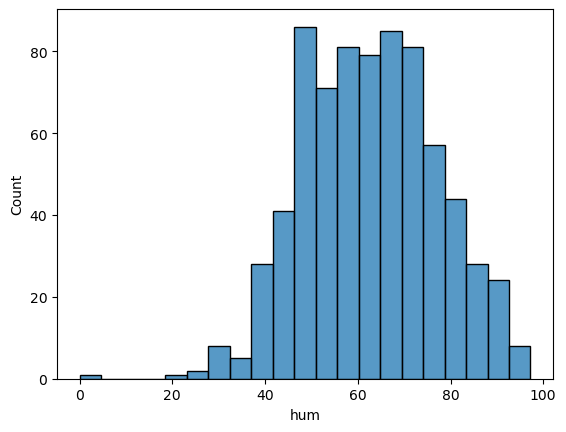

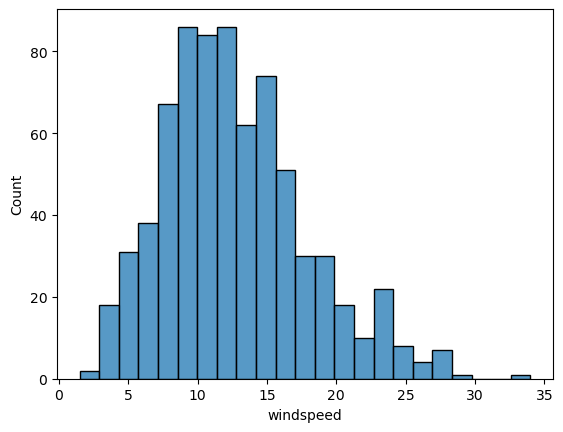

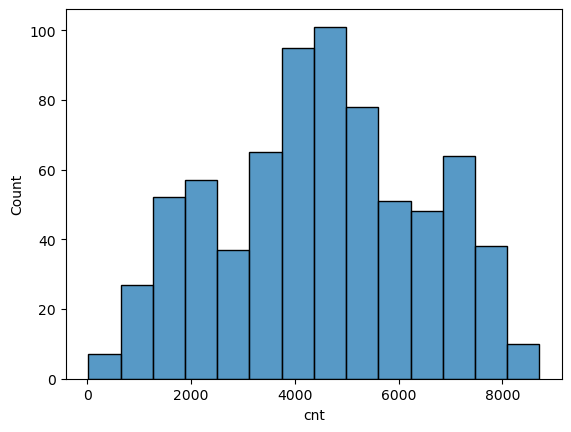

In [108]:
for i in cont_cols:
    sns.histplot(x = df[i])
    plt.show()

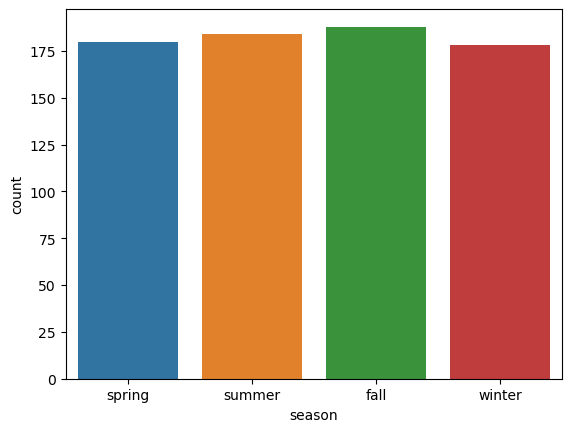

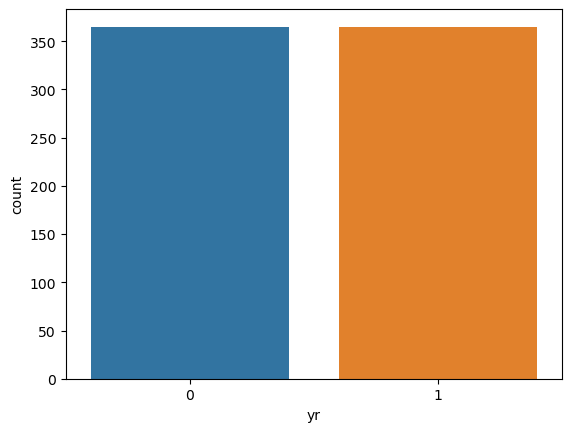

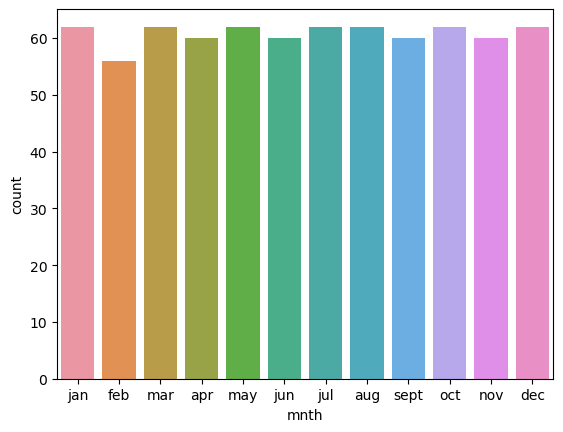

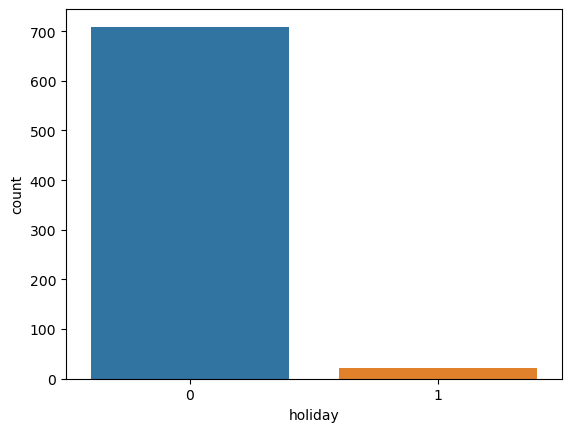

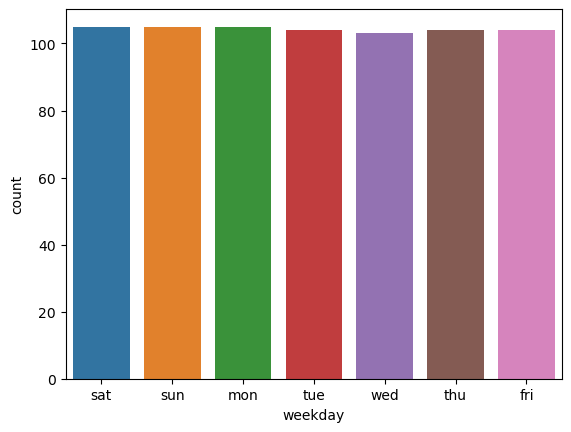

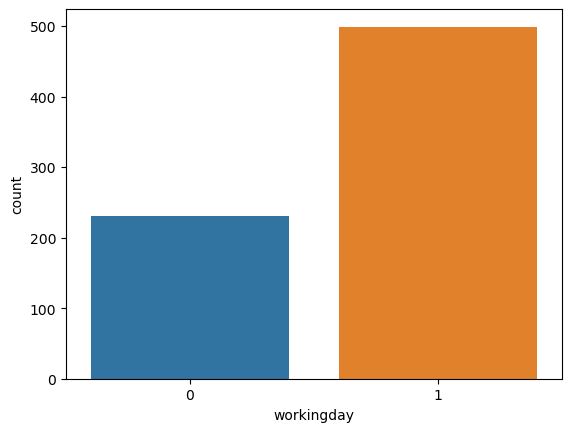

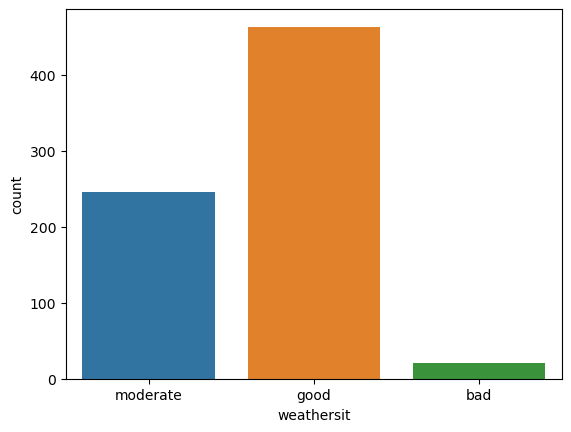

In [61]:
for i in cat_cols:
    sns.countplot(x = df[i])
    plt.show()

### Bivariate Analysis

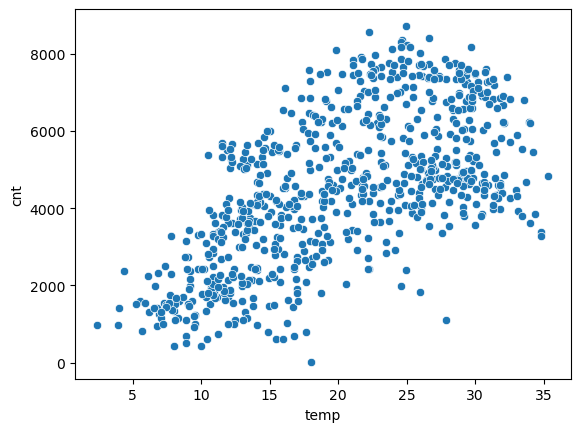

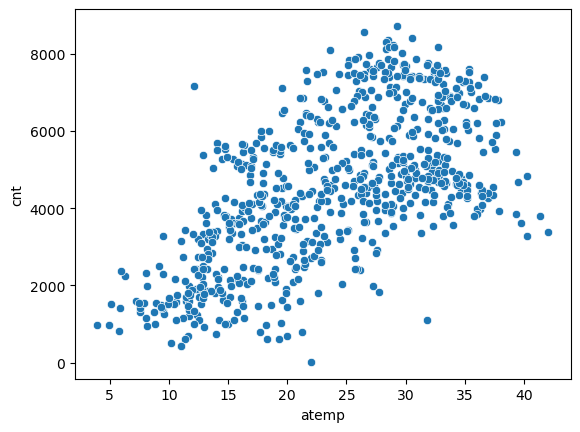

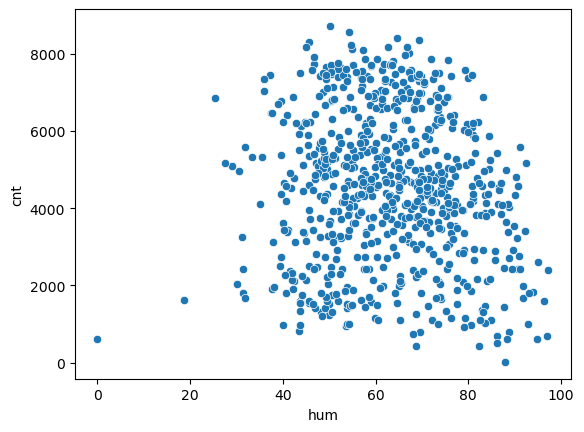

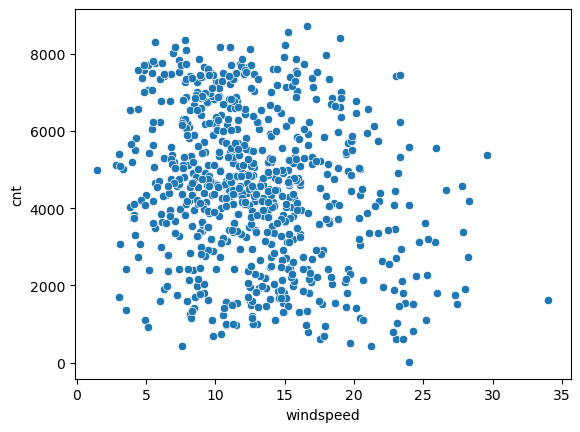

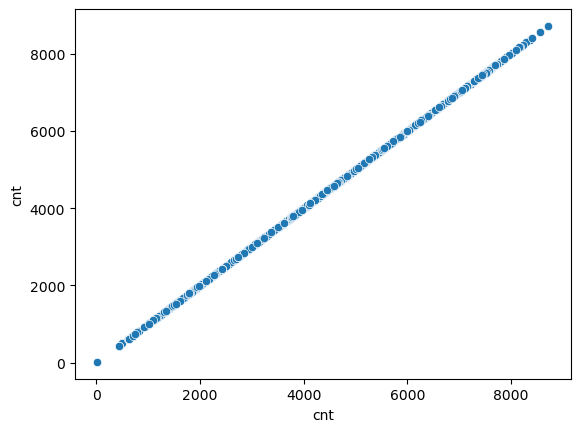

In [109]:
for i in cont_cols:
    sns.scatterplot(x=df[i], y = df['cnt'])
    plt.show()

#### from the above charts it is understandable that cnt is in linear relationship with temp and atemp

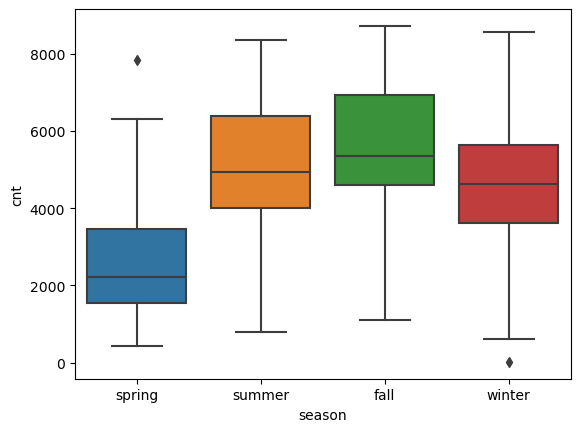

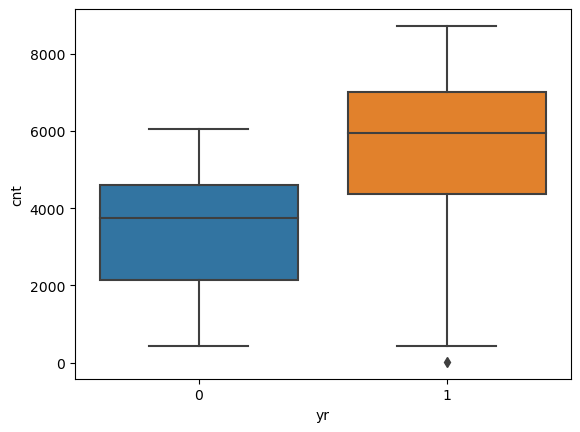

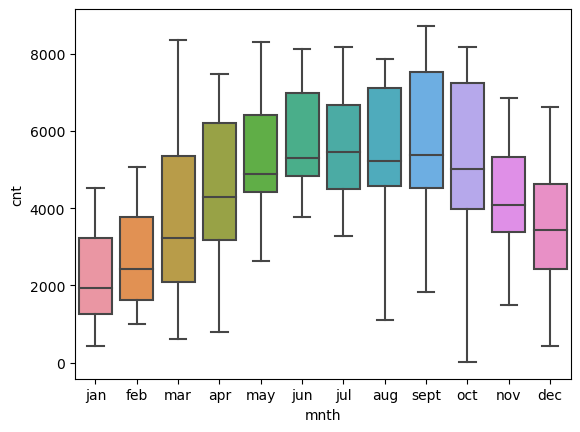

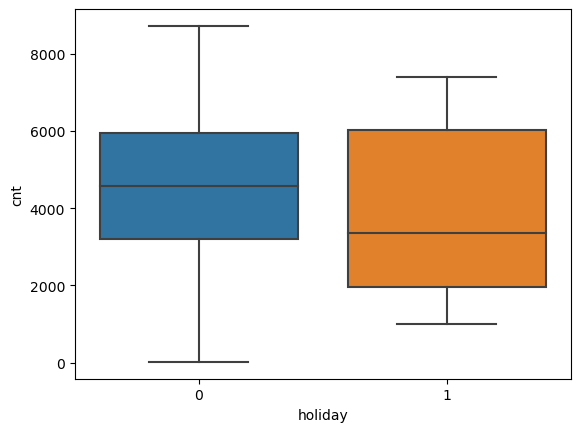

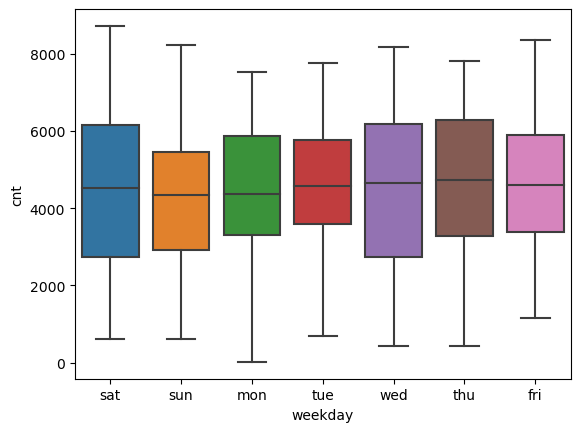

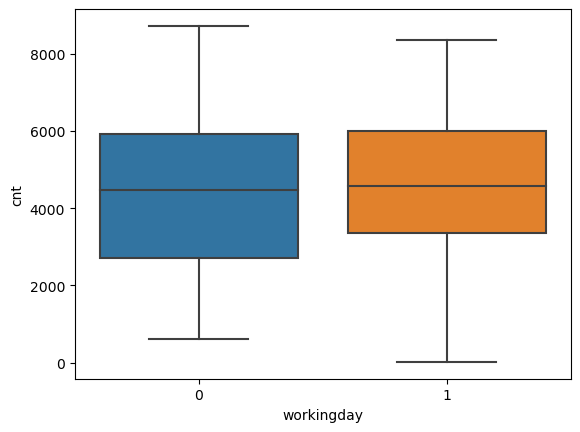

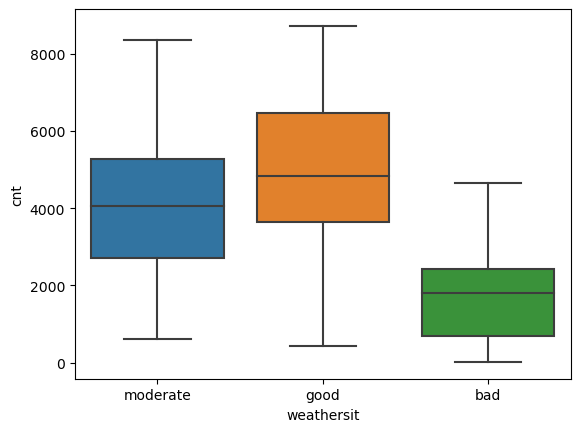

In [110]:
for i in cat_cols:
    sns.boxplot(x=df[i], y = df['cnt'])
    plt.show()

#### Inference

Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for year 2019  has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathersit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions

In [111]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Data Preparation for linear regression

### Create Dummy variables for all categorical variables

In [112]:
df = pd.get_dummies(data = df, columns = ['season','mnth','weekday'],drop_first=True)
df = pd.get_dummies(data=df, columns =['weathersit'])

#### dropping the first column as (p-1) dummies can explain p categories
first column not dropped for weathersit field so as not to lose info about weather situation types as it's not self explanatory

In [113]:
#print columns after creating dummies
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [114]:
# to check sample data
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


## Model Building
### Split data into training and test data

In [115]:
X = df.drop(['cnt'], axis=1)
y = df['cnt']

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [117]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [118]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled

temp,atemp,hum,windspeed

In [119]:
# Importing required libraries

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [120]:
# Scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [121]:
# Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [122]:
# Inspect training data after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Feature selection using RFE

In [124]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=12)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False])

In [125]:
selected_features = X_train.columns[selector.support_]

In [126]:
selected_features

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [127]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [128]:
# Using stasmodels here to build model as it gives clear statistics about performance
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

## Model1

In [129]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.12e-190
Time:                        12:04:58   Log-Likelihood:                -4125.2
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2035.7687    330.535      6.159      0.000    1386.354    2685.183
yr               1997.7614     70.709     28.253      0.000    1858.838    2136.685
holiday          -846.1472    222.604     -3.801      0.000   -1283.505    -408.789
temp             4613.8186    293.147     15.739      0.000    4037.861    5189.776
hum             -1508.7314    328.681     -4.590      0.000   -2154.504    -862.959
windspeed       -1584.4723    224.157     -7.069      0.000   -2024.883   -1144.062
season_spring    -486.7202    181.711     -2.679      0.008    -843.735    -129.706
season_summer     462.3388    130.631      3.539      0.000     205.683     718.995
season_winter     860.7718    150.317      5.726      0.000     565.437    1156.106
mnth_jul         -499.7815    159.537     -3.133      0.002    -813.230    -186.333
mnth_sept         721.9948    145.701      4.955      0.000     435.730    1008.260
weathersit_bad  -1602.5630    217.760     -7.359      0.000   -2030.404   -1174.722
weathersit_good   460.1684     91.318      5.039      0.000     280.751     639.585
==============================================================================
Omnibus:                       57.563   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.018
Skew:                          -0.613   Prob(JB):                     5.85e-29
Kurtosis:                       5.145   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### let's calculate VIF to understand the less important columns

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,2.078173
1,holiday,1.043080
2,temp,18.812705
3,hum,22.905612
4,windspeed,4.644440
5,season_spring,4.647461
6,season_summer,2.940663
7,season_winter,3.718131
8,mnth_jul,1.589091
9,mnth_sept,1.389340


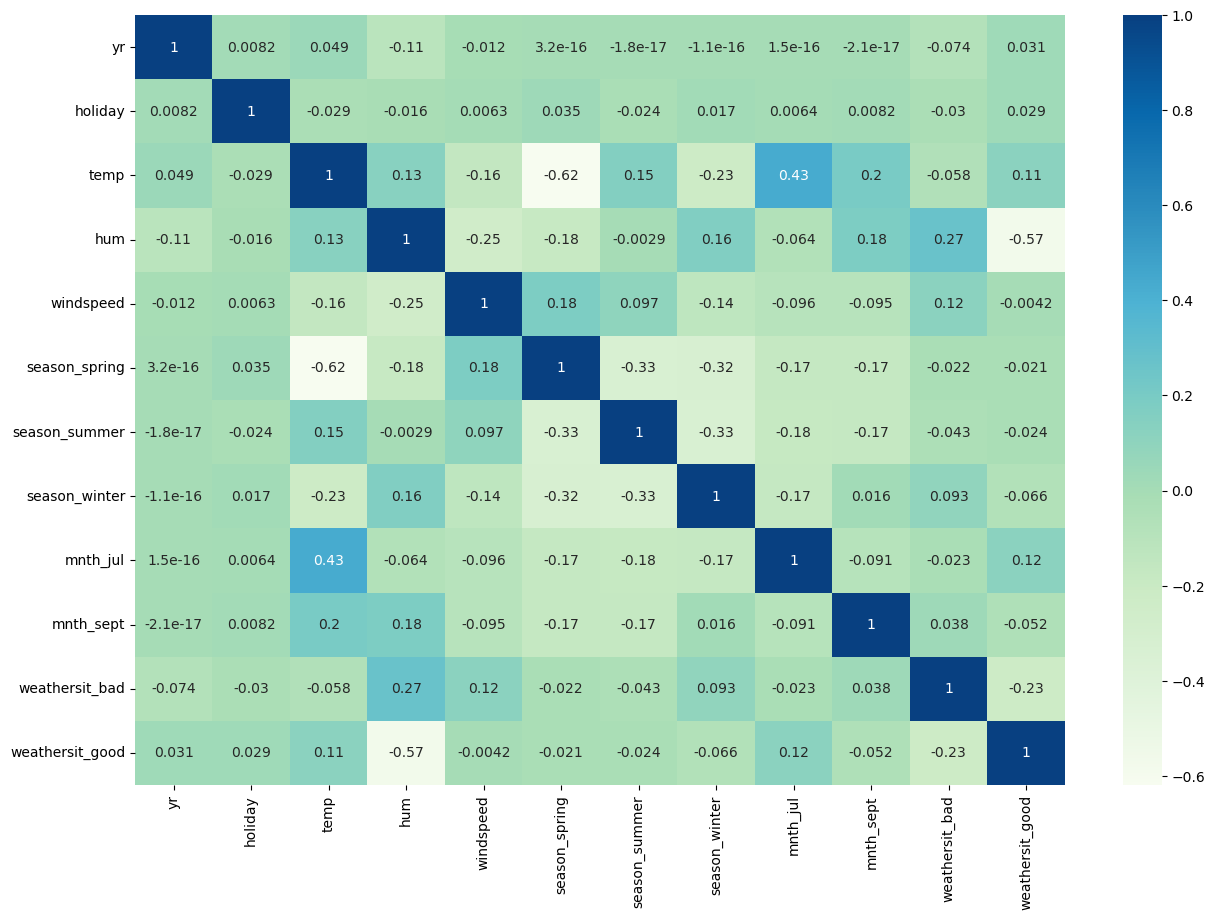

In [131]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [132]:
#dropping 'mnth_jul' column as it is highly correlated with temp
X_train_sm = X_train_sm.drop('mnth_jul',axis=1)
X_test_sm = X_test_sm.drop('mnth_jul',axis=1)


In [133]:
X_train = X_train.drop('mnth_jul',axis=1)
X_test= X_test.drop('mnth_jul',axis=1)

## Model 2

In [134]:
model2=sm.OLS(y_train,X_train_sm) 
res2=model2.fit() 
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          8.97e-190
Time:                        12:05:11   Log-Likelihood:                -4130.2
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     499   BIC:                             8335.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1925.5687    331.547      5.808      0.000    1274.168    2576.970
yr               2004.7708     71.295     28.120      0.000    1864.696    2144.845
holiday          -835.4705    224.535     -3.721      0.000   -1276.621    -394.321
temp             4472.8625    292.221     15.306      0.000    3898.728    5046.997
hum             -1445.0879    330.937     -4.367      0.000   -2095.290    -794.886
windspeed       -1573.5326    226.101     -6.959      0.000   -2017.759   -1129.306
season_spring    -378.1426    179.943     -2.101      0.036    -731.682     -24.603
season_summer     609.0205    123.023      4.950      0.000     367.313     850.728
season_winter     976.9456    146.952      6.648      0.000     688.225    1265.667
mnth_sept         854.9473    140.609      6.080      0.000     578.689    1131.206
weathersit_bad  -1631.4863    219.477     -7.434      0.000   -2062.699   -1200.273
weathersit_good   456.7501     92.115      4.958      0.000     275.769     637.731
==============================================================================
Omnibus:                       65.046   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.326
Skew:                          -0.686   Prob(JB):                     1.02e-32
Kurtosis:                       5.244   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,2.077351
1,holiday,1.042830
2,temp,17.801152
3,hum,22.903407
4,windspeed,4.640741
5,season_spring,4.529654
6,season_summer,2.587942
7,season_winter,3.531764
8,mnth_sept,1.278696
9,weathersit_bad,1.143082


In [136]:
# dropping 'hum' column as it has high VPF
X_train = X_train.drop('hum',axis=1)
X_test = X_test.drop('hum',axis=1)
X_train_sm = X_train_sm.drop('hum',axis=1)
X_test_sm = X_test_sm.drop('hum',axis=1)

## Model 3

In [137]:
model3=sm.OLS(y_train,X_train_sm) 
res3=model3.fit() 
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          6.20e-187
Time:                        12:05:19   Log-Likelihood:                -4139.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     500   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             986.3378    256.826      3.840      0.000     481.747    1490.929
yr               2039.7992     72.110     28.287      0.000    1898.122    2181.476
holiday          -841.5233    228.551     -3.682      0.000   -1290.562    -392.484
temp             4158.7207    288.298     14.425      0.000    3592.295    4725.146
windspeed       -1286.4009    220.202     -5.842      0.000   -1719.035    -853.766
season_spring    -478.2109    181.674     -2.632      0.009    -835.150    -121.272
season_summer     540.8859    124.215      4.354      0.000     296.838     784.934
season_winter     834.0443    145.827      5.719      0.000     547.535    1120.554
mnth_sept         789.4360    142.310      5.547      0.000     509.837    1069.035
weathersit_bad  -1795.1879    220.124     -8.155      0.000   -2227.670   -1362.706
weathersit_good   688.4960     76.638      8.984      0.000     537.924     839.068
==============================================================================
Omnibus:                       63.477   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.156
Skew:                          -0.675   Prob(JB):                     1.35e-31
Kurtosis:                       5.204   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,2.071192
1,holiday,1.042792
2,temp,4.697564
3,windspeed,4.627170
4,season_spring,2.016559
5,season_summer,1.848615
6,season_winter,1.602724
7,mnth_sept,1.216705
8,weathersit_bad,1.113689
9,weathersit_good,2.830780


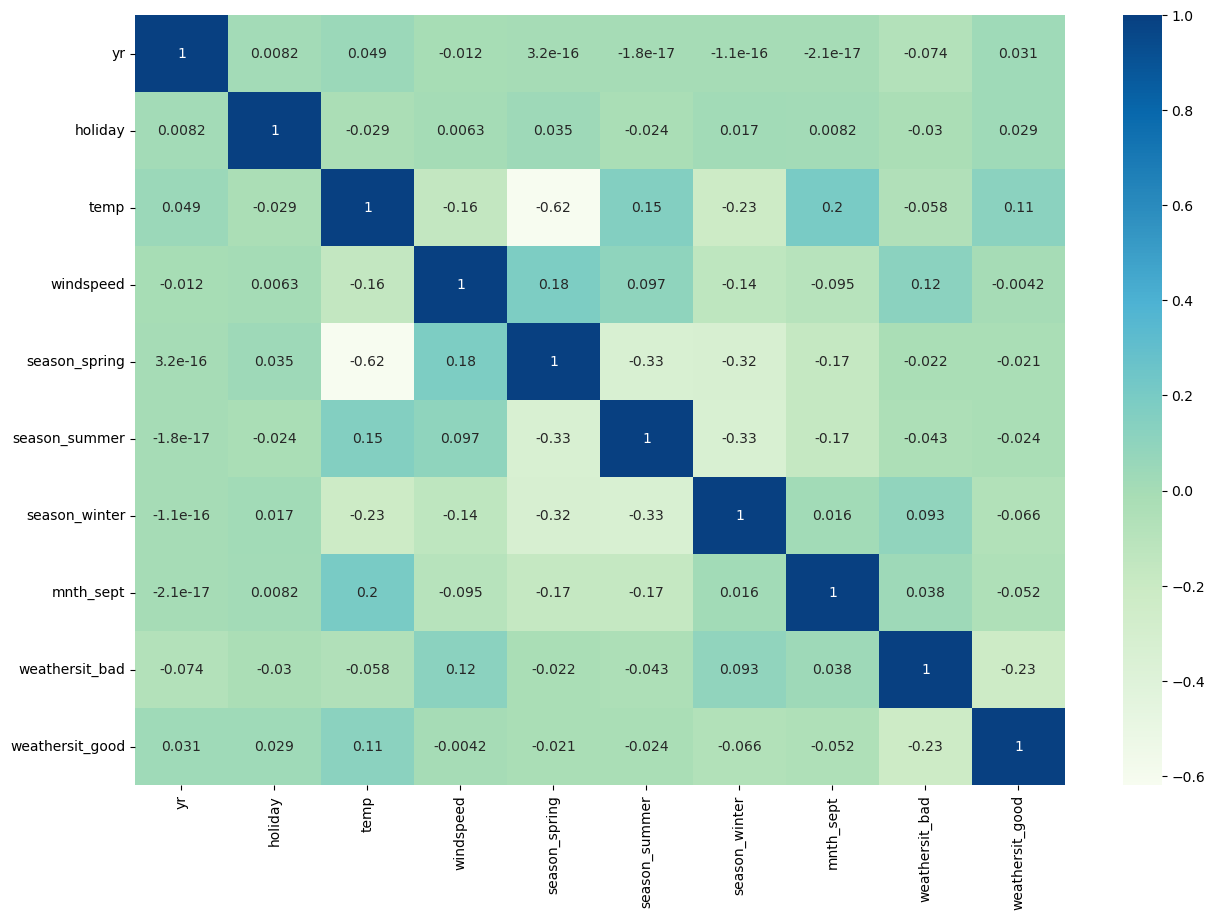

In [139]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [140]:
#dropping 'season_summer' column as it has highly correlated with temp
X_train = X_train.drop('season_summer',axis=1)
X_test = X_test.drop('season_summer',axis=1)
X_train_sm = X_train_sm.drop('season_summer',axis=1)
X_test_sm = X_test_sm.drop('season_summer',axis=1)

### Model 4

In [141]:
model4=sm.OLS(y_train,X_train_sm) 
res4=model4.fit() 
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.95e-184
Time:                        12:09:05   Log-Likelihood:                -4149.3
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     501   BIC:                             8361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1676.4396    205.687      8.150      0.000    1272.325    2080.554
yr               2051.9803     73.336     27.980      0.000    1907.896    2196.065
holiday          -842.8243    232.612     -3.623      0.000   -1299.839    -385.810
temp             3533.5370    254.447     13.887      0.000    3033.623    4033.451
windspeed       -1174.3093    222.577     -5.276      0.000   -1611.609    -737.009
season_spring   -1021.2604    134.455     -7.596      0.000   -1285.425    -757.096
season_winter     407.5773    109.964      3.706      0.000     191.530     623.625
mnth_sept         603.0799    138.134      4.366      0.000     331.687     874.473
weathersit_bad  -1831.3343    223.876     -8.180      0.000   -2271.185   -1391.483
weathersit_good   673.9400     77.925      8.649      0.000     520.839     827.041
==============================================================================
Omnibus:                       62.397   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.368
Skew:                          -0.642   Prob(JB):                     3.67e-33
Kurtosis:                       5.317   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) \
                 for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,2.055250
1,holiday,1.042792
2,temp,4.609052
3,windspeed,3.958817
4,season_spring,1.695251
5,season_winter,1.365369
6,mnth_sept,1.158115
7,weathersit_bad,1.113548
8,weathersit_good,2.822601


#### Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.82
Let us select Model 4 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi collinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [144]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [146]:
#Let us build the finalmodel using sklearn
cols = ['yr','holiday','temp','windspeed','season_spring','season_winter','mnth_sept','weathersit_bad','weathersit_good']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1676.4395752947198 [ 2051.98033818  -842.82434796  3533.53698003 -1174.30931506
 -1021.26039308   407.57726503   603.07988726 -1831.33429518
   673.94004972]


## Model Evaluation

### Residual Analysis

In [147]:
y_train_pred = lr.predict(X_train[cols])

 ### 1. Linearity Check

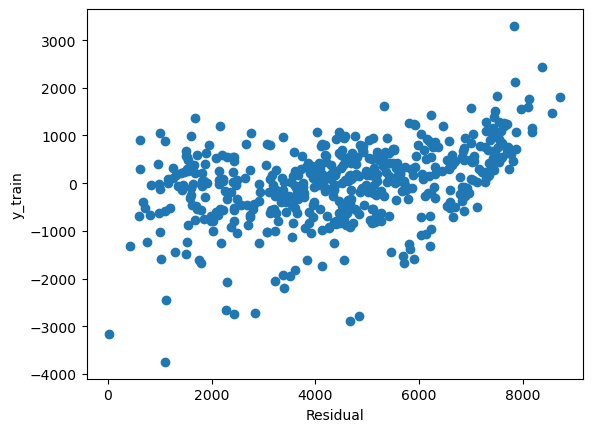

In [149]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [150]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

### 2. Checking if Error terms are normally distributed or not

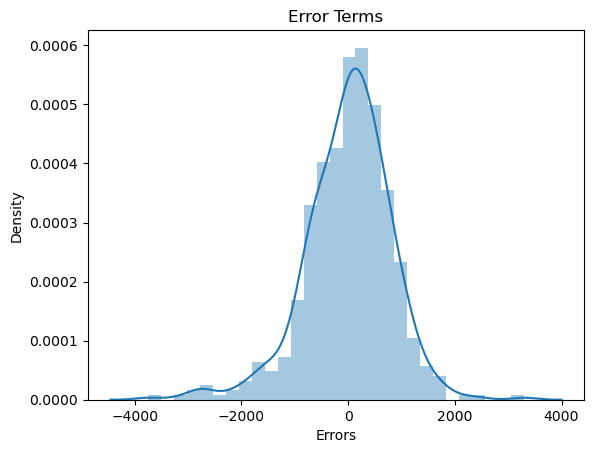

In [151]:
plot_res_dist(y_train, y_train_pred)

### Errors are normally distribured here with mean 0. So everything seems to be fine

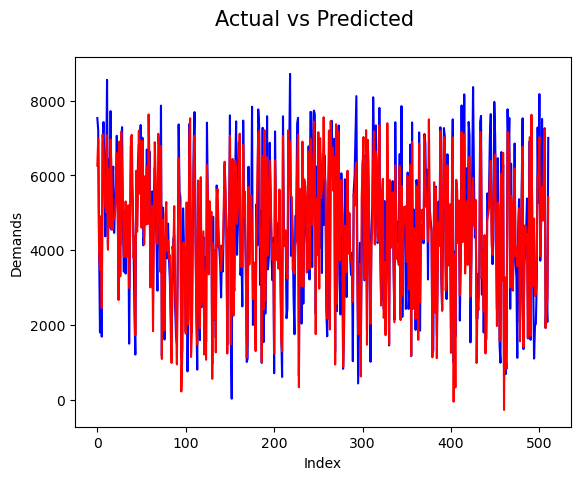

In [152]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems ok

### 3. To check if error terms are independent of each other or not

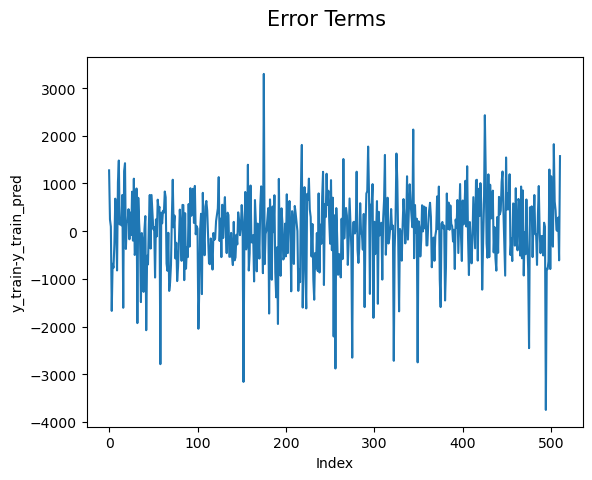

In [153]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Here,If we see the error terms are independent of each other.

### 4. To check error terms have constant variance

In [155]:
y_test_pred = lr.predict(X_test[cols])

Text(0, 0.5, 'y_test_pred')

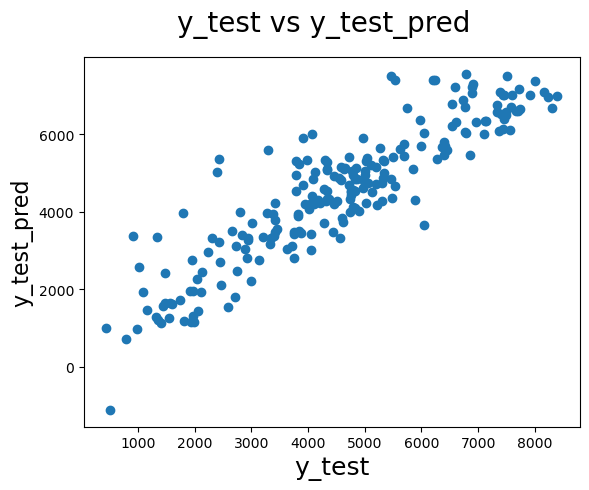

In [156]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

### R-Squared value for train predictions

In [160]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.826345180984825

### Predict values for test data set

In [161]:
#Columns from our final model
cols = ['yr','holiday','temp','windspeed','season_spring','season_winter','mnth_sept','weathersit_bad','weathersit_good']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### R-Squared value for test predictions

In [162]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8045301205784532

#### R-Squared value of prediction on train data is 0.82 where as R-squared value of prediction on test data is 0.80, both are very close that means our model is good. This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

### Conclusion:

##### Significant variables to predict the demand for shared bikes:

#### temp  - directly related with demand
#### Year (2019) - demand increasing in 2019
#### windspeed  - inversly related demand
#### weathersit( Clear ) ->has increasing demand , weather situation (Light snow/Light Rain) --> has decreasing demand for bikes
#### holiday - inversly related with demand
#### Season(Spring)  -  invesly related, season_winter directly related